In [21]:
deps <- c("ISLR", "ndjson", "ggplot2", "dplyr", "caret", "tidyr", "gridExtra")
for (p in deps) {
    if (!requireNamespace(p, quietly = TRUE)) {
        install.packages(p, repos = "https://cran.rstudio.com")
    }
    library(p, character.only = TRUE)
}
# options(scipen=999)

df <- ndjson::stream_in("./hyperparams.jsonl")
head(df)

accuracy,config.crossmax_k,config.dataset,config.lr,config.num_epochs,f1_score,precision,recall
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8473,2,cifar10,0.1,4,0.8456128,0.8513854,0.8473
0.8546,3,cifar10,0.1,4,0.8546434,0.8573104,0.8546
0.8527,2,cifar10,0.1,8,0.8534217,0.8599223,0.8527
0.8530,3,cifar10,0.1,8,0.8531091,0.8558171,0.8530
0.8254,2,cifar10,0.1,16,0.8261520,0.8312919,0.8254
0.8242,3,cifar10,0.1,16,0.8244577,0.8305586,0.8242


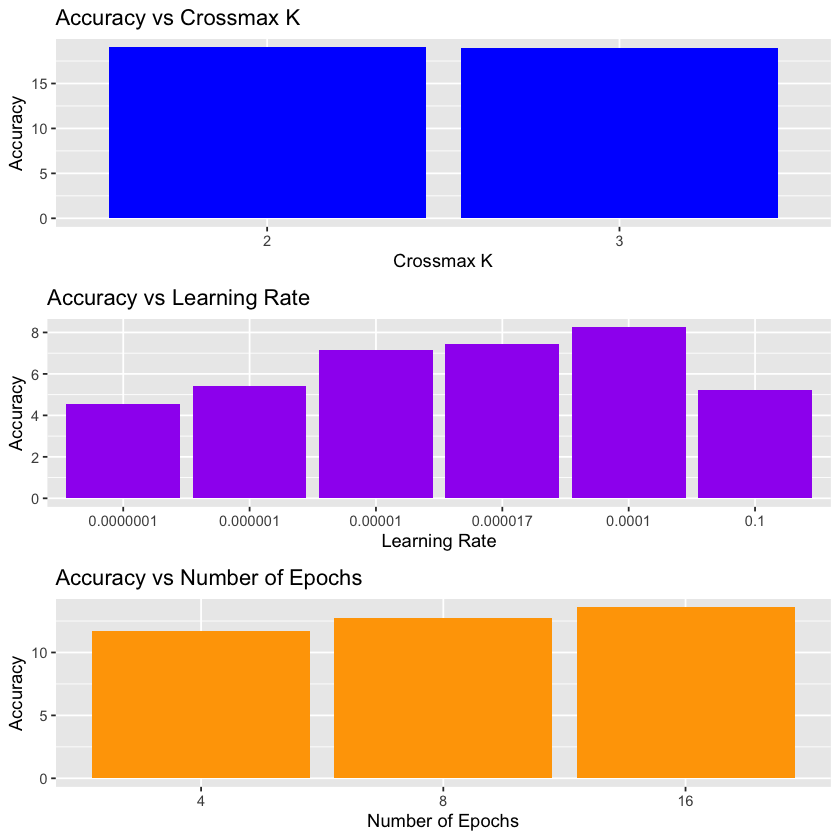

In [25]:
p1 <- ggplot(df, aes(x=factor(config.crossmax_k), y=accuracy)) +
    geom_bar(stat="identity", fill="blue") +
    labs(title="Accuracy vs Crossmax K", x="Crossmax K", y="Accuracy")

p2 <- ggplot(df, aes(x=factor(config.lr), y=accuracy)) +
    geom_bar(stat="identity", fill="purple") +
    labs(title="Accuracy vs Learning Rate", x="Learning Rate", y="Accuracy")

p3 <- ggplot(df, aes(x=factor(config.num_epochs), y=accuracy)) +
    geom_bar(stat="identity", fill="orange") +
    labs(title="Accuracy vs Number of Epochs", x="Number of Epochs", y="Accuracy")

grid.arrange(p1, p2, p3, ncol=1)


best results:

```plaintext
{
    "dataset": ["cifar10", "cifar100"],
    "lr": [1e-4],
    "num_epochs": [16],
    "crossmax_k": [2],
}
```

more epochs would probably increase perf by just <1%. so this should be fine.

k=2 is the best value for both datasets (cifar10 k=3 is just better by 0.1% so it's not too important).